In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

In [3]:
with np.load(fname) as dobj:
    dat = dict(**dobj)

In [4]:
print(dat.keys())

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])


`dat` has the following fields:
    - `stimuli`: stim x i x j array of grayscale stimulus images
    - `stimuli_test`: stim x i x j array of grayscale stimulus images in the test set
    - `responses`: stim x voxel array of z-scored BOLD response amplitude
    - `responses_test`:  stim x voxel array of z-scored BOLD response amplitude in the test set
    - `roi`: array of voxel labels
    - `roi_names`: array of names corresponding to voxel labels

In [5]:
print(dat["stimuli"].shape)

(1750, 128, 128)


In [6]:
print(dat["responses"].shape)

(1750, 8428)


This is the number of voxels in each ROI. Note that `"Other"` voxels have been removed from this version of the dataset:

In [7]:
dict(zip(dat["roi_names"], np.bincount(dat["roi"])))

{'Other': 0,
 'V1': 1294,
 'V2': 2083,
 'V3': 1790,
 'V3A': 484,
 'V3B': 314,
 'V4': 1535,
 'LatOcc': 928}

Each stimulus is a 128 x 128 grayscale array:

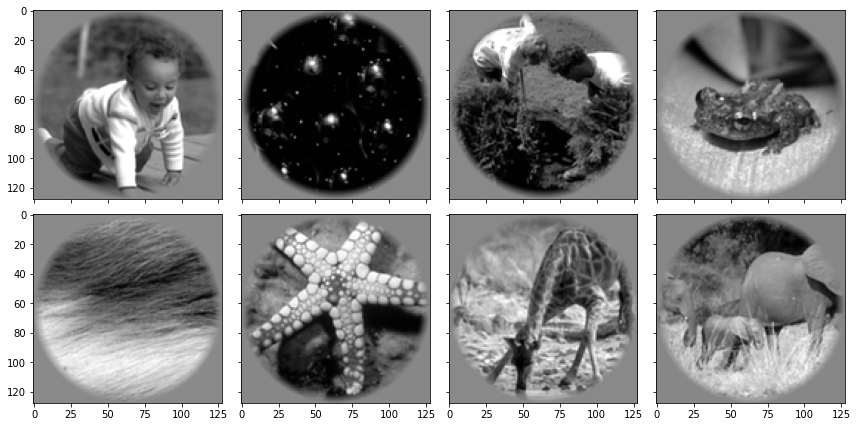

In [8]:
f, axs = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
for ax, im in zip(axs.flat, dat["stimuli"]):
  ax.imshow(im, cmap="gray")
f.tight_layout()

Each stimulus is associated with a pattern of BOLD response across voxels in visual cortex:

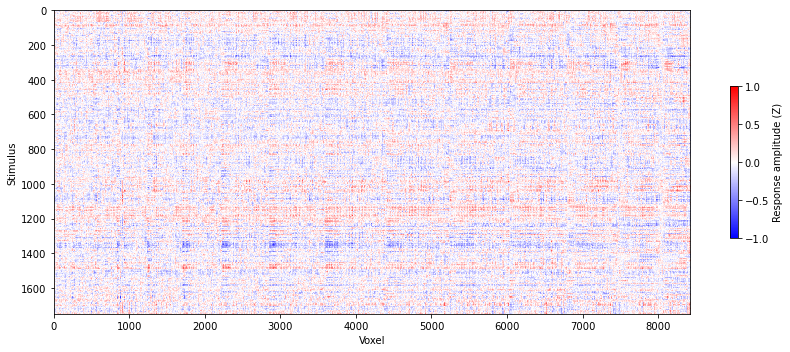

In [9]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

The training/validation splits from the original paper are retained, so the 120 test stimuli and responses are in separate data structures:

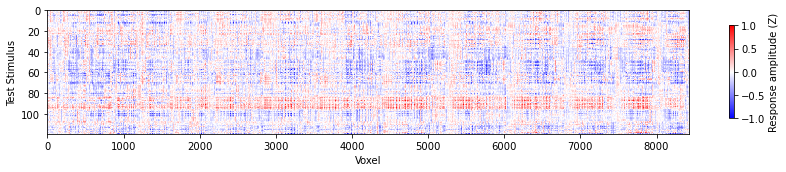

In [10]:
f, ax = plt.subplots(figsize=(12, 2.5))
ax.set(xlabel="Voxel", ylabel="Test Stimulus")
heatmap = ax.imshow(dat["responses_test"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.75, label="Response amplitude (Z)")
f.tight_layout()